In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline

In [39]:
path_experiment = "/raid/home/smelo/PingUMiL-pytorch/experiment_log/deathpred_sup_gs/cool-sunset-2"
p1_pred = pd.read_csv(os.path.join(path_experiment,"pingumil_dp_p2.csv"))

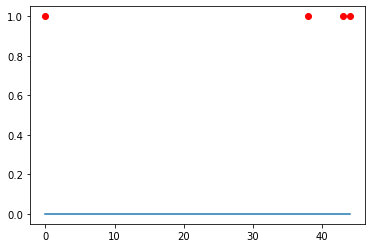

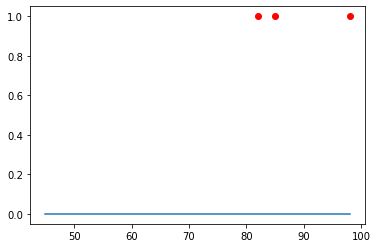

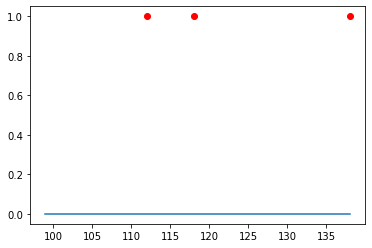

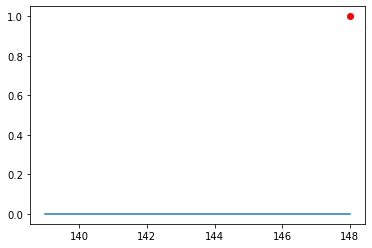

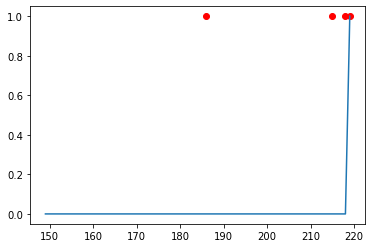

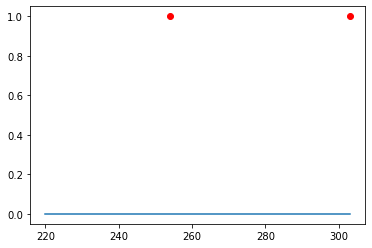

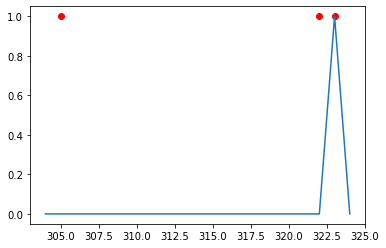

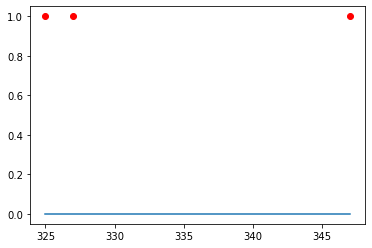

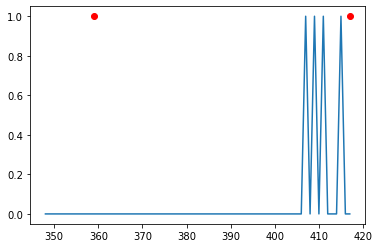

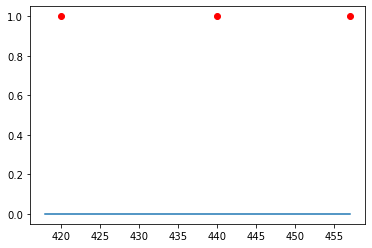

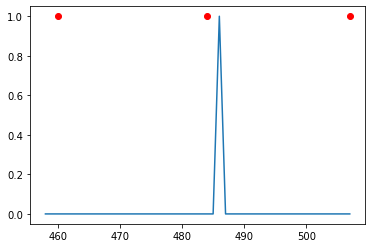

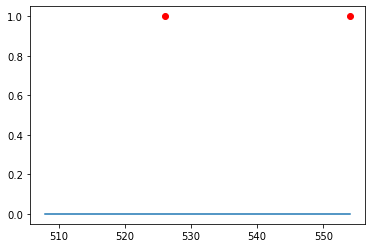

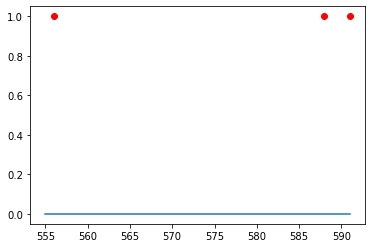

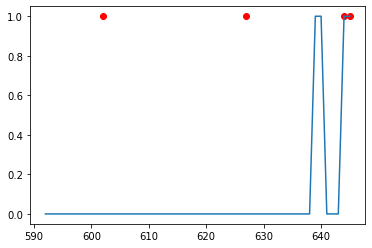

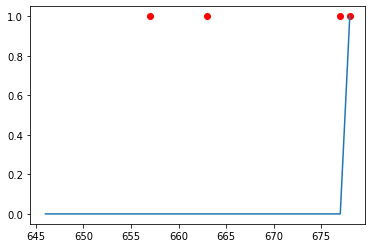

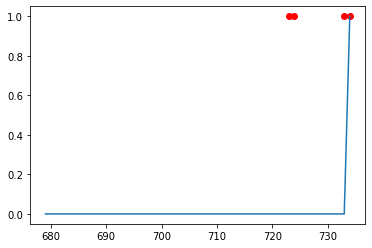

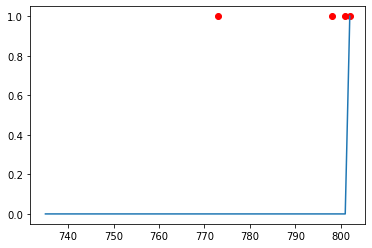

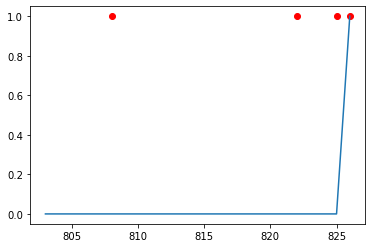

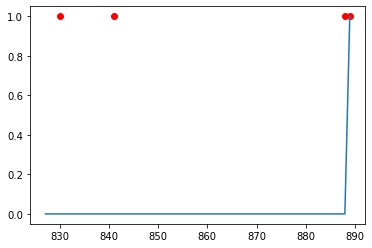

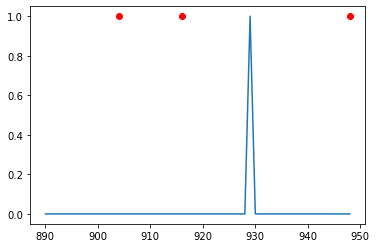

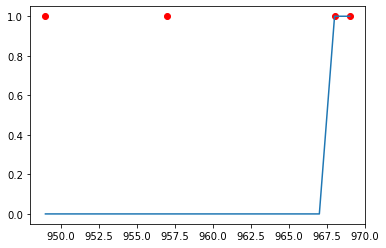

In [40]:
sources = p1_pred["source"].unique()
for source in sources:
    p1_s_pred = p1_pred[p1_pred["source"]==source]
    #print(p1_s_pred)
    fig, ax = plt.subplots()
    ax.plot(p1_s_pred.index, p1_s_pred["y_hat"])
    p1_s_true = p1_s_pred[p1_s_pred["y"]>0]
    ax.scatter(p1_s_true.index, p1_s_true["y"], c="r")
    plt.savefig(f"output_deathpread_view/p2_{os.path.basename(source)}.png")
    plt.show()

In [10]:
p1_pred

,index,source,y,y_hat
0,34,/raid/home/smelo/PingUMiL-pytorch/dataset/Smok...,[0.],[0.]
1,73,/raid/home/smelo/PingUMiL-pytorch/dataset/Smok...,[0.],[0.]
2,160,/raid/home/smelo/PingUMiL-pytorch/dataset/Smok...,[0.],[0.]
3,207,/raid/home/smelo/PingUMiL-pytorch/dataset/Smok...,[0.],[0.]
4,252,/raid/home/smelo/PingUMiL-pytorch/dataset/Smok...,[0.],[0.]
...,...,...,...,...
965,806,/raid/home/smelo/PingUMiL-pytorch/dataset/Smok...,[0.],[0.]
966,832,/raid/home/smelo/PingUMiL-pytorch/dataset/Smok...,[0.],[0.]
967,897,/raid/home/smelo/PingUMiL-pytorch/dataset/Smok...,[0.],[0.]
968,943,/raid/home/smelo/PingUMiL-pytorch/dataset/Smok...,[0.],[0.]


### Metrics analysis

In [1]:
from glob import glob

In [6]:
baselines = glob("deathpredictioneval/*_test.csv")
p1_baselines = [x for x in baselines if "willdieplayer01" in x]
p2_baselines = [x for x in baselines if "willdieplayer02" in x]
print(sorted(p1_baselines))
print(sorted(p2_baselines))

['deathpredictioneval/asm_sk10f_lr_kmeansk10_willdieplayer01_test.csv', 'deathpredictioneval/asm_sk10f_lr_kmeansk20_willdieplayer01_test.csv', 'deathpredictioneval/asm_sk10f_lr_kmeansk5_willdieplayer01_test.csv', 'deathpredictioneval/asm_sk10f_lr_spectralg55kk10_willdieplayer01_test.csv', 'deathpredictioneval/asm_sk10f_lr_spectralg55kk20_willdieplayer01_test.csv', 'deathpredictioneval/asm_sk10f_lr_spectralg55kk5_willdieplayer01_test.csv', 'deathpredictioneval/asm_sk10f_lr_willdieplayer01_test.csv', 'deathpredictioneval/dp_lgb_sk10f_lr_csf_kmeansk10_willdieplayer01_test.csv', 'deathpredictioneval/dp_lgb_sk10f_lr_csf_kmeansk20_willdieplayer01_test.csv', 'deathpredictioneval/dp_lgb_sk10f_lr_csf_kmeansk5_willdieplayer01_test.csv', 'deathpredictioneval/dp_lgb_sk10f_lr_csf_spectralg55kk10_willdieplayer01_test.csv', 'deathpredictioneval/dp_lgb_sk10f_lr_csf_spectralg55kk20_willdieplayer01_test.csv', 'deathpredictioneval/dp_lgb_sk10f_lr_csf_spectralg55kk5_willdieplayer01_test.csv', 'deathpredic

In [20]:
def make_baseline_df(baseline_csvs):
    dataframes = []
    for file in baseline_csvs:
        df = pd.read_csv(file, index_col=0)
        df["model"] = "_".join([x for x in os.path.basename(file).split("_") if not any(y in x for y in ["sk10f","lr","willdie","test"])])
        df.drop(columns="fold", inplace=True)
        dataframes.append(df)
    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df
p1_df = make_baseline_df(p1_baselines)
p2_df = make_baseline_df(p2_baselines)

In [23]:
p1_df.sort_values(by="f1_test", ascending=False)

,parameters,accuracy_test,precision_test,recall_test,f1_test,model
19,"{""n_estimators"": 50}",0.881546,0.546861,0.536428,0.540257,rf_spectralg55kk20
25,"{""n_estimators"": 50, ""num_leaves"": 10, ""object...",0.895954,0.554635,0.533846,0.539632,lgb
29,"{""n_estimators"": 50, ""num_leaves"": 10, ""object...",0.887781,0.548572,0.532551,0.537308,lgb_kmeansk10
10,"{""n_estimators"": 50, ""num_leaves"": 10, ""object...",0.892768,0.548557,0.527998,0.532672,lgb_spectralg55kk10
11,"{""n_estimators"": 50}",0.861596,0.531497,0.532863,0.532140,rf_kmeansk10
14,"{""ASM"": ""ASM""}",0.865337,0.528462,0.527633,0.528030,asm_kmeansk5
17,"{""n_estimators"": 50, ""num_leaves"": 10, ""object...",0.897756,0.548691,0.523444,0.527231,lgb_kmeansk5
33,"{""n_estimators"": 50}",0.869364,0.526919,0.526538,0.526725,rf
42,"{""n_estimators"": 50, ""num_leaves"": 10, ""object...",0.896509,0.545769,0.522768,0.526298,lgb_spectralg55kk20
4,"{""n_estimators"": 50}",0.880299,0.529018,0.521232,0.523470,rf_kmeansk5


In [24]:
p2_df.sort_values(by="f1_test", ascending=False)

,parameters,accuracy_test,precision_test,recall_test,f1_test,model
4,"{""ASM"": ""ASM""}",0.900249,0.578219,0.557471,0.565276,asm_spectralg55kk5
8,"{""ASM"": ""ASM""}",0.899002,0.567848,0.548699,0.555600,asm_kmeansk5
32,"{""n_estimators"": 50, ""num_leaves"": 10, ""object...",0.921446,0.623171,0.536477,0.547918,lgb_spectralg55kk20
27,"{""ASM"": ""ASM""}",0.910224,0.578208,0.538538,0.547744,asm_spectralg55kk10
6,"{""n_estimators"": 50}",0.896509,0.554692,0.539256,0.544627,rf_kmeansk20
30,"{""n_estimators"": 50, ""num_leaves"": 10, ""object...",0.927681,0.688805,0.531732,0.541750,lgb_kmeansk20
26,"{""n_estimators"": 50, ""num_leaves"": 10, ""object...",0.923699,0.593198,0.527048,0.534127,lgb
20,"{""n_estimators"": 50}",0.872818,0.532510,0.534605,0.533476,rf_kmeansk5
12,"{""n_estimators"": 50}",0.856608,0.526153,0.533981,0.528580,dp_rf_csf_spectralg55kk10
22,"{""n_estimators"": 50}",0.886534,0.531487,0.525786,0.527939,rf_spectralg55kk5
